# Image processing

In this notebook we will run some sample scripts to illustrate concepts of image processing applied in the course.

## Set the environment

In [1]:
import cv2
import math
import numpy as np
from skimage import io # required to read your own image from a url

from matplotlib import pyplot as plt

## Load image

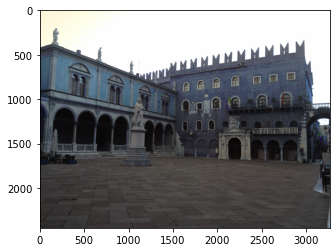

In [2]:
img = cv2.imread('data/Verona.jpg')
plt.imshow(img)
plt.show()

In [3]:
# Alternatively, load image from URL
#img = io.imread('https://live.staticflickr.com/65535/49079256481_e676533e01_b_d.jpg')
#plt.imshow(img) ,plt.title('web image')
#plt.show()

## Image representation

### Binary images

[[255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0 255 255 255 255 255 255   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255   0   0]
 [255 255 255 255 255   0   0   0   0   0   0   0   0 255 255 255   0   0]
 [255 255 255 255 255   0   0   0   0   0   0   0   0 255 255   0   0   0]
 [255 255 255 255 255   0   0   0   0   0   0   0   0 255 255   0   0   0]
 [255 255 255 255 255   0   0   0   0   0   0   0   0 255 255   0   0   0]
 [255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [255 255 255 255   0   0

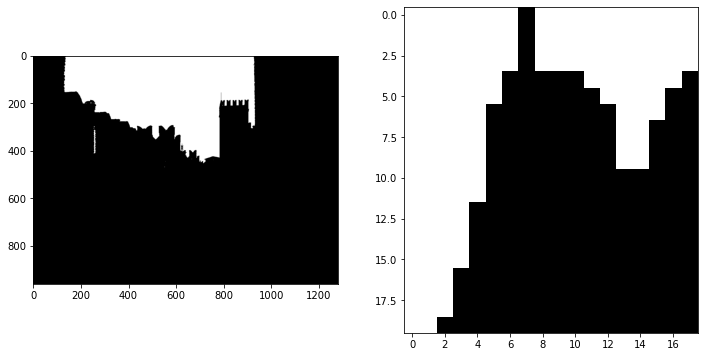

In [4]:
img = cv2.imread('data/Verona_bw.pbm')
print(img[186:206,782:800,0])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharex=False, sharey=False)
ax1.imshow(img)
ax2.imshow(img[186:206,782:800])
plt.show()


### Grayscale images

[[250 249 250 246 248 250 240 179 234 251 250 245 232 249 251 246 249 248]
 [250 249 251 248 246 248 242 172 235 252 249 248 243 245 244 253 249 245]
 [249 249 253 250 248 247 236 165 238 250 248 239 236 250 247 244 244 248]
 [249 249 246 251 249 253 235 159 211 242 255 240 243 250 246 251 244 254]
 [249 249 251 251 244 231 157  86  94 120 193 245 237 247 244 248 250 185]
 [249 250 248 240 253 232 108  89  96  89  90 160 235 247 249 254 173  85]
 [248 247 249 244 253 196  93  91  98  99 100  84 198 253 253 202  99  91]
 [248 247 248 248 246 149  67 102  93 103 105  84 129 241 247 133  89 103]
 [248 247 249 247 203  88  85  94  99 107 103 101 100 221 224  97 106 109]
 [248 247 249 253 236 101  73 104 108 111 103  99  86 208 202  76 114 118]
 [248 248 247 251 242 117  76  94  97 104 116 106  85 188 181  69 106 112]
 [249 248 248 245 206  87  73  91  84 101 109  99  72  97 103  66  87  96]
 [249 249 249 210  90  70  72  98 104 105 102  93  86  77  89  93  95 103]
 [249 249 253 215  83  62

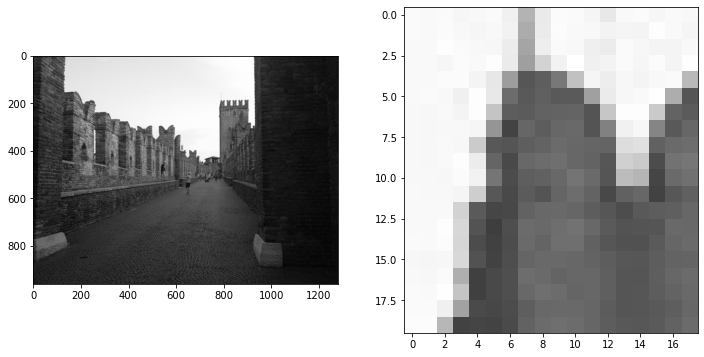

In [5]:
img = cv2.imread('data/Verona_gray.png')
print(img[186:206,782:800,0])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharex=False, sharey=False)
ax1.imshow(img)
ax2.imshow(img[186:206,782:800])
plt.show()

### Color images

[[252 251 250 246 248 250 240 179 234 251 250 245 232 249 251 246 249 248]
 [252 251 251 248 246 248 242 172 235 252 249 248 243 245 244 253 249 245]
 [251 251 253 250 248 247 236 165 238 250 248 239 236 250 247 244 244 248]
 [251 251 246 251 249 253 235 159 211 242 255 240 243 250 246 251 244 254]
 [251 251 251 251 244 231 157  86  94 120 193 245 237 247 244 248 250 185]
 [251 252 248 240 253 232 108  87  94  87  88 158 235 247 249 254 171  81]
 [250 249 251 246 255 196  91  87  91  92  95  80 198 255 255 202  94  84]
 [250 249 250 250 248 149  65  97  84  92  96  79 129 243 249 131  82  92]
 [250 249 251 249 205  88  81  87  88  95  92  94  98 221 224  93  97  97]
 [250 249 251 255 238 101  69  95  96  97  91  90  82 206 200  71 103 104]
 [250 250 249 253 242 115  71  85  83  88 102  95  78 183 176  60  92  96]
 [251 250 250 247 206  85  68  80  68  83  93  85  63  90  96  55  71  78]
 [251 251 251 212  90  68  65  86  86  86  83  77  75  68  80  81  77  84]
 [251 251 255 217  83  58

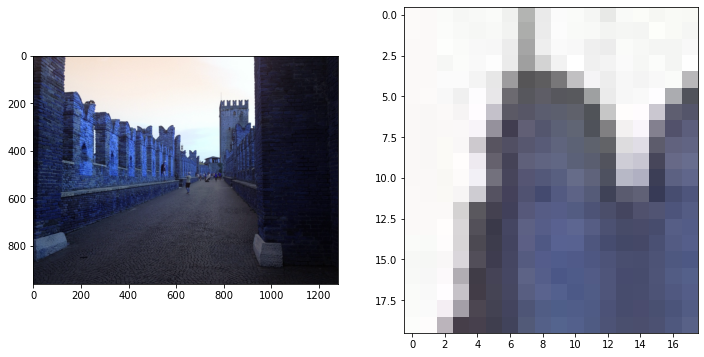

In [6]:
img = cv2.imread('data/Verona_color.png')
print(img[186:206,782:800,0])
print(img[186:206,782:800,1])
print(img[186:206,782:800,2])
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharex=False, sharey=False)
ax1.imshow(img)
ax2.imshow(img[186:206,782:800])
plt.show()

## Image manipulation

In [7]:
height,width,channels = img.shape
img2= cv2.resize(img,(round(0.25*width), round(0.25*height)), interpolation = cv2.INTER_LINEAR)
height,width,channels = img2.shape
print('image is ', height,'x', width, 'x', channels)
# convert color space
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print(flags)

image is  240 x 320 x 3
['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_BAYER_GR2GRAY', 'COLOR_BAYER_GR2RGB', 'COLOR_BAYER_GR2RGBA', 'COLOR_BAYER_GR2RGB_EA', 'COLOR_BAYER_GR2RGB_VNG', 'COLOR_BAYER_RG2BGR', 'COLOR_BAYER_RG2BGRA', 'COLOR_BAYER_RG2BGR_EA', 'COLOR_BAYER_RG2BGR_VNG', 'COLOR_BAYER_RG2GRAY', 'COLOR_BAYER_RG2RGB', 'COLOR_BAYER_RG2RGBA', 'COLOR_BAYER_RG2RGB_EA', 'COLOR_BAYER_RG2RGB_VNG', 'COLOR_BGR2BGR555', 'COLOR_BGR2BGR565', 'COLOR_BGR2BGRA', 'COLOR_BGR2GRAY', 'COLOR_BGR2HLS', 'COLOR_BGR2HLS_FULL', 

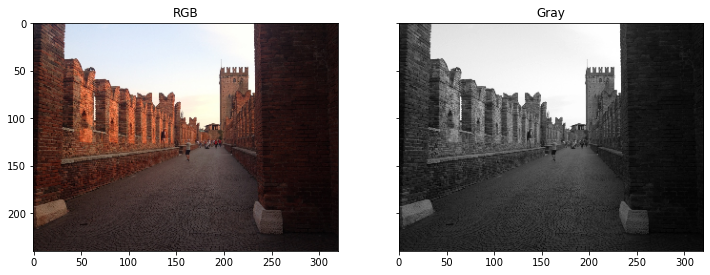

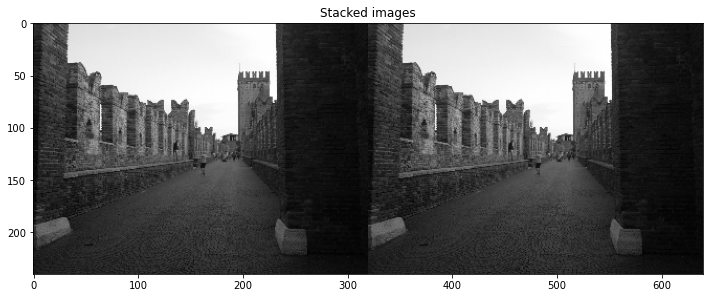

In [8]:
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
ax1.imshow(img2_rgb), ax1.set_title('RGB')
ax2.imshow(img2_gray, cmap="gray"),ax2.set_title('Gray')
plt.show()
# stack images horizontally
res = np.hstack((img2_gray,img2_gray)) # stack images side-by-side
plt.figure(1, figsize=(12,6))
plt.imshow(res,cmap="gray"),plt.title('Stacked images')
plt.show()

## Image distortions

/Users/patrick/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


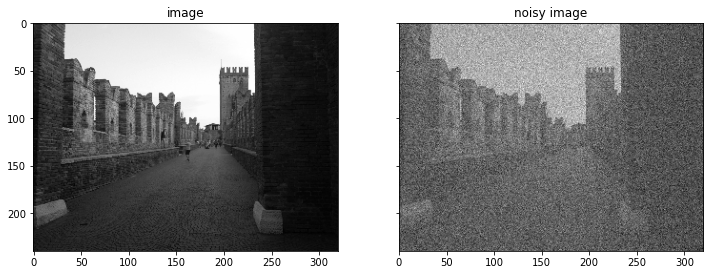

In [9]:
noise = np.zeros(img2_gray.shape, np.float) # initialize noise matrix
cv2.randn(noise,0,50)  # gaussian noise - destination, mean, std
img2_noisy = img2_gray + noise
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
ax1.imshow(img2_gray,cmap="gray"), ax1.set_title('image')
ax2.imshow(img2_noisy,cmap="gray"),ax2.set_title('noisy image')
plt.show()
#print(noise[0:10,0:10])

## Pixel operations

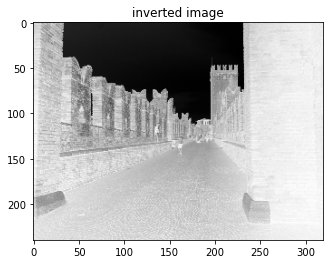

In [10]:
# Inversion
img2_gray_inv = 255 - img2_gray

plt.imshow(img2_gray_inv, cmap="gray") ,plt.title('inverted image')
plt.show()

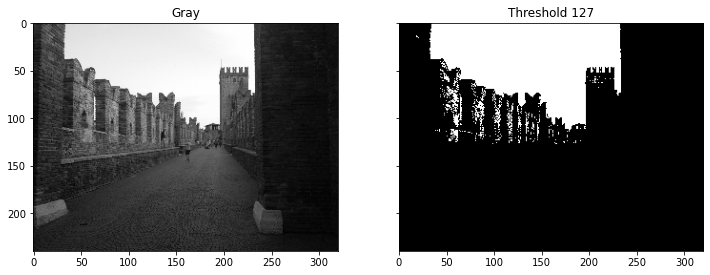

In [11]:
# Image thresholding
th = 127
ret,img2_gray_th = cv2.threshold(img2_gray,th,255,cv2.THRESH_BINARY)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
ax1.imshow(img2_gray, cmap="gray"),ax1.set_title('Gray')
ax2.imshow(img2_gray_th, cmap="gray"), ax2.set_title('Threshold '+str(th))
plt.show()

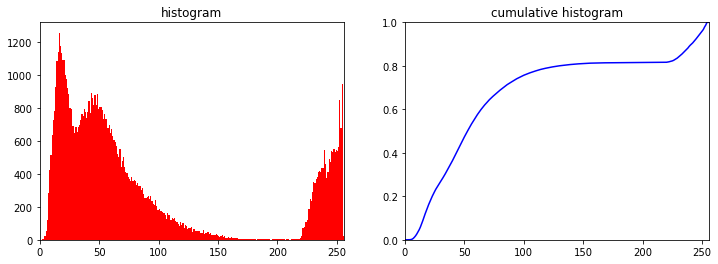

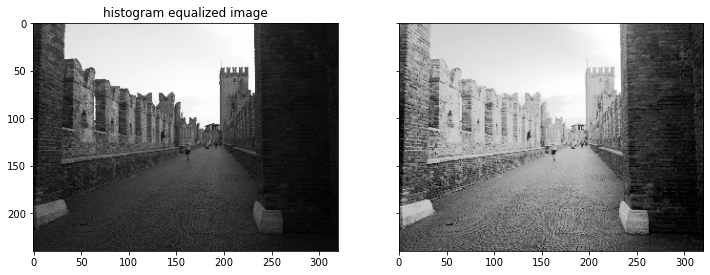

In [12]:
# Histograms
# First we create and plot the histogram
hist,bins = np.histogram(img2_gray.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf/cdf.max()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4), sharex=True, sharey=False)
ax1.hist(img2_gray.flatten(),256,[0,256], color = 'r'), ax1.set_xlim([0,256]), ax1.set_title('histogram')
ax2.plot(cdf_normalized, color = 'b'), ax2.set_ylim([0,1]), ax2.set_title('cumulative histogram')
plt.show()

img2_gray_histeq = cdf[img2_gray]
# alternatively
img2_gray_eq = cv2.equalizeHist(img2_gray)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6), sharex=True, sharey=True)
ax1.imshow(img2_gray,cmap="gray"), ax1.set_title('input image')
ax2.imshow(img2_gray_histeq,cmap="gray"), ax1.set_title('histogram equalized image')
plt.show()

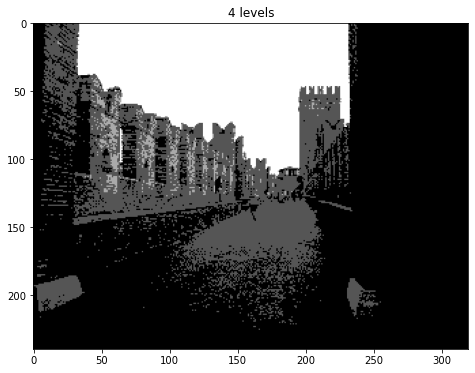

In [13]:
# Image quantization
N = 4 # number of levels
img2_gray_q = np.floor(img2_gray/(256/N))*(256/N)

fig, (ax1) = plt.subplots(ncols=1, figsize=(12, 6), sharex=True, sharey=True)
ax1.imshow(img2_gray_q, cmap="gray"),ax1.set_title(str(N)+' levels')
plt.show()

## Filtering

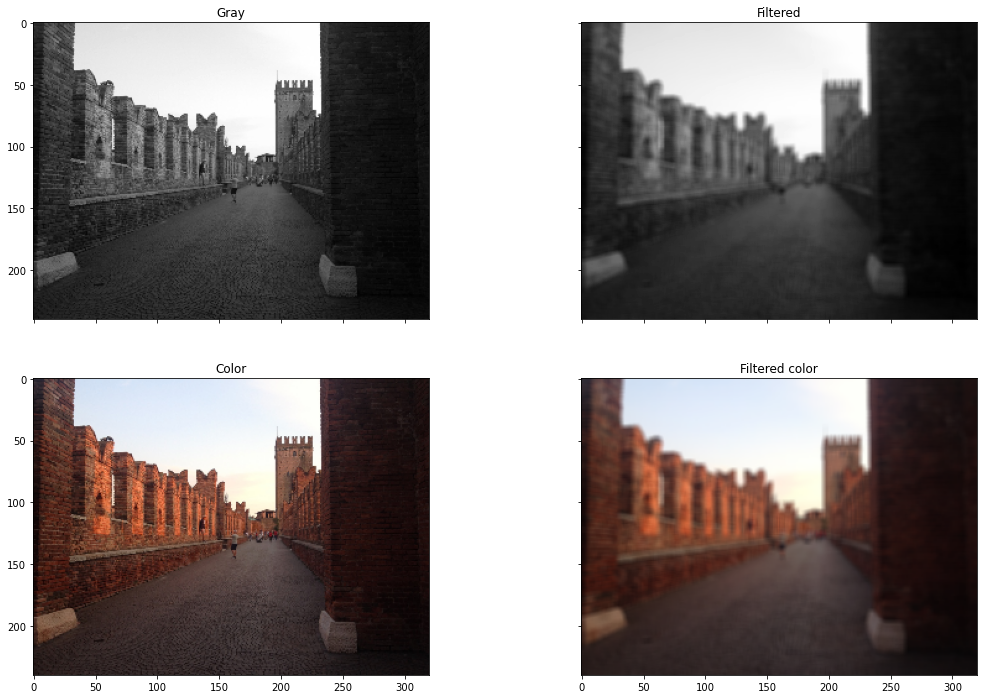

In [14]:
# Linear filtering
kernel_size = 5
kernel = np.ones((kernel_size,kernel_size),np.float32)/(kernel_size*kernel_size)
img2_gray_filt = cv2.filter2D(img2_gray,-1,kernel)
img2_rgb_filt = cv2.filter2D(img2_rgb,-1,kernel)
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(18, 12), sharex=True, sharey=True)
axes[0,0].imshow(img2_gray, cmap="gray"), axes[0,0].set_title('Gray')
axes[0,1].imshow(img2_gray_filt, cmap="gray"), axes[0,1].set_title('Filtered')
axes[1,0].imshow(img2_rgb), axes[1,0].set_title('Color')
axes[1,1].imshow(img2_rgb_filt), axes[1,1].set_title('Filtered color')
plt.show()

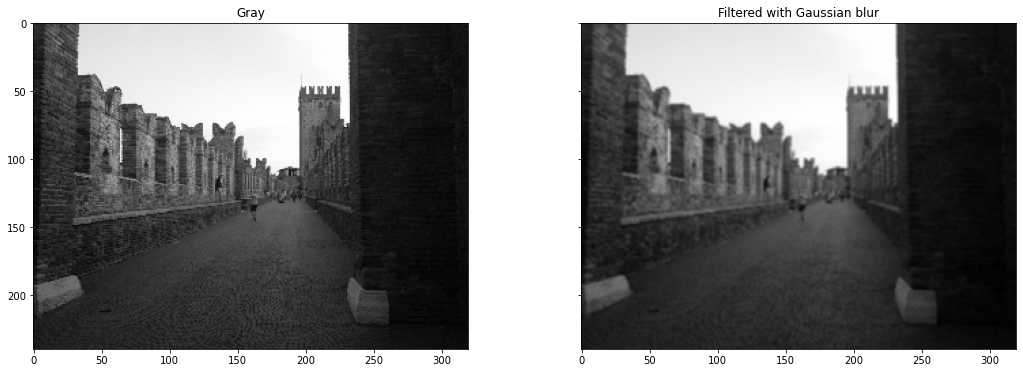

In [15]:
img2_gray_gauss = cv2.GaussianBlur(img2_gray,(3,3),0)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=True, sharey=True)
ax1.imshow(img2_gray, cmap="gray"),ax1.set_title('Gray')
ax2.imshow(img2_gray_gauss, cmap="gray"), ax2.set_title('Filtered with Gaussian blur')
plt.show()

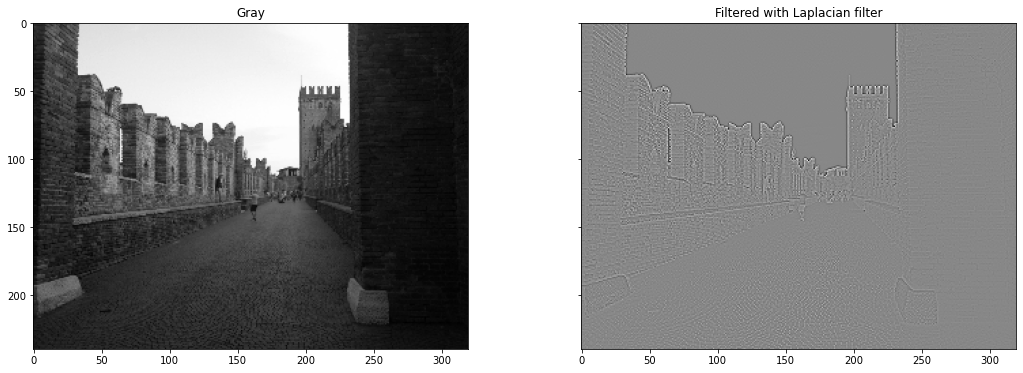

In [16]:
img2_gray_laplacian = cv2.Laplacian(img2_gray,cv2.CV_64F) # note CV_64F format, because CV_8U would clip negative values, so would require abs
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=True, sharey=True)
ax1.imshow(img2_gray, cmap="gray"),ax1.set_title('Gray')
ax2.imshow(img2_gray_laplacian, cmap="gray"), ax2.set_title('Filtered with Laplacian filter')
plt.show()

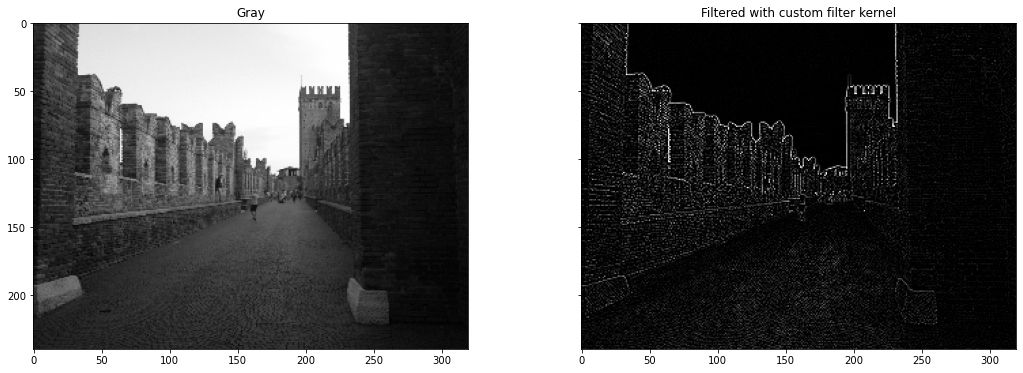

In [17]:
kernel = np.int8([[0, -1, 0],[-1, 4, -1],[0, -1, 0]])
img2_gray_filter = cv2.filter2D(img2_gray,-1,kernel)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=True, sharey=True)
ax1.imshow(img2_gray, cmap="gray"),ax1.set_title('Gray')
ax2.imshow(img2_gray_filter, cmap="gray"), ax2.set_title('Filtered with custom filter kernel')
plt.show()

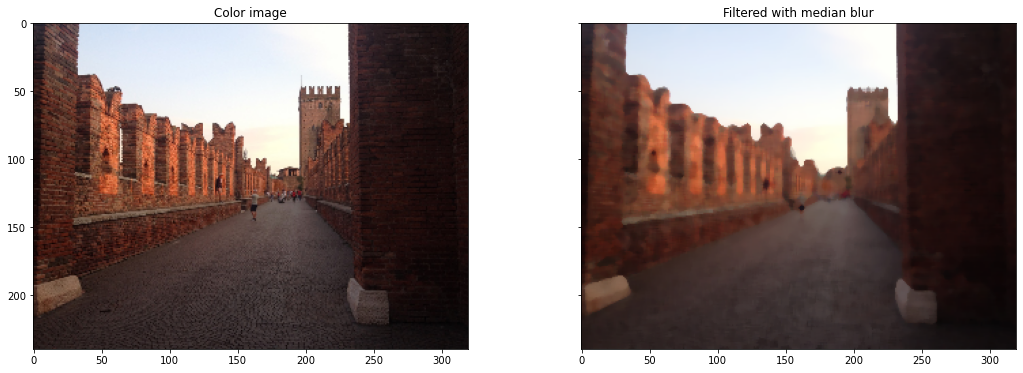

In [18]:
# median blur filtering
img2_rgb_median = cv2.medianBlur(img2_rgb,5)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=True, sharey=True)
ax1.imshow(img2_rgb),ax1.set_title('Color image')
ax2.imshow(img2_rgb_median), ax2.set_title('Filtered with median blur')
plt.show()

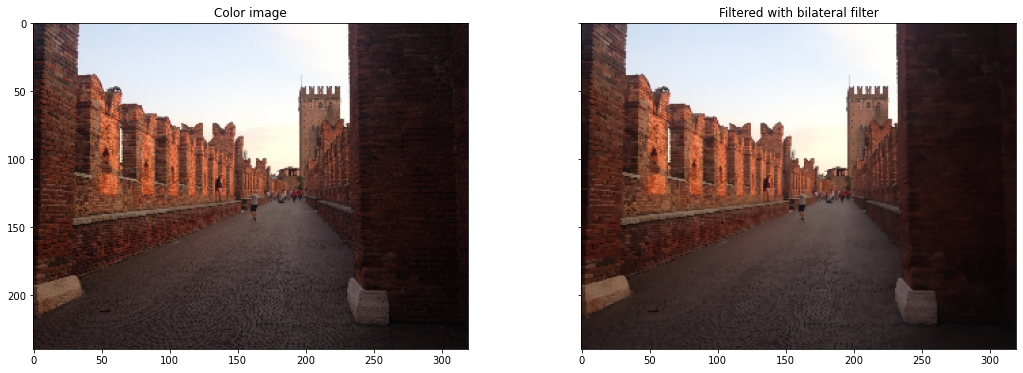

In [19]:
# bilateral filter
img2_rgb_bilateral = cv2.bilateralFilter(img2_rgb,5,25,25)
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 6), sharex=True, sharey=True)
ax1.imshow(img2_rgb),ax1.set_title('Color image')
ax2.imshow(img2_rgb_bilateral), ax2.set_title('Filtered with bilateral filter')
plt.show()

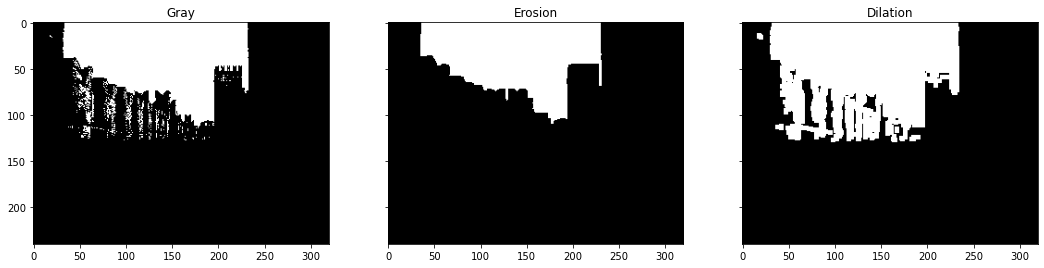

In [20]:
# morphological filters
kernel = np.ones((5,5),np.uint8)
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
#kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
img_erode = cv2.erode(img2_gray_th, kernel, iterations=1)
img_dilate = cv2.dilate(img2_gray_th, kernel, iterations=1)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6), sharex=True, sharey=True)
ax1.imshow(img2_gray_th, cmap="gray"),ax1.set_title('Gray')
ax2.imshow(img_erode, cmap="gray"), ax2.set_title('Erosion')
ax3.imshow(img_dilate, cmap="gray"), ax3.set_title('Dilation')
plt.show()

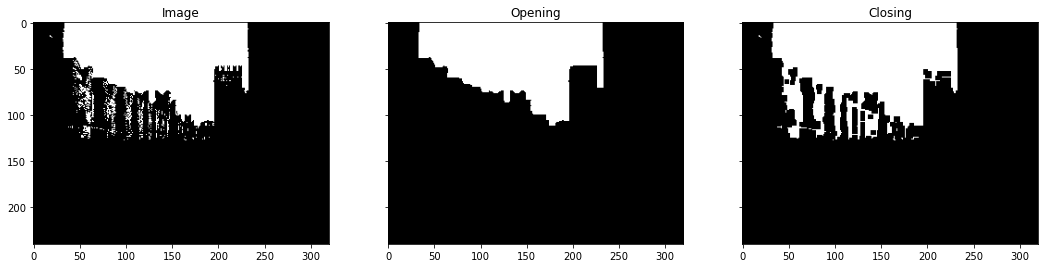

In [21]:
th = 127
img_open = cv2.dilate(cv2.erode(img2_gray_th, kernel, iterations=1), kernel, iterations=1)
# img_open = cv2.morphologyEx(img2_gray_th, cv2.MORPH_OPEN, kernel)
img_close = cv2.erode(cv2.dilate(img2_gray_th, kernel, iterations=1), kernel, iterations=1)


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 6), sharex=True, sharey=True)
ax1.imshow(img2_gray_th, cmap="gray"), ax1.set_title('Image')
ax2.imshow(img_open, cmap="gray"),ax2.set_title('Opening')
ax3.imshow(img_close, cmap="gray"), ax3.set_title('Closing')
plt.show()

## Image warping

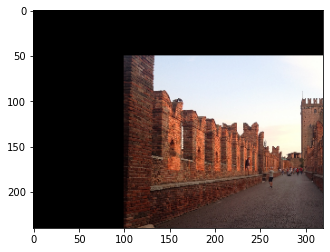

In [22]:
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img2,M,(width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
alpha = 10*math.pi/180
M = np.float32([[math.cos(alpha), -math.sin(alpha), 0],[math.sin(alpha),math.cos(alpha),0]])
dst = cv2.warpAffine(img2,M,(width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
M = cv2.getRotationMatrix2D((width/2, height/2),-10,1)
dst = cv2.warpAffine(img2,M,(width, height))

plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
pts1 = np.float32([[56,65],[158,52],[28,237],[289,230]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img2_rgb,M,(300,300))

plt.subplot(121),plt.imshow(img2_rgb),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# Notes

Other packages exist for image processing in Python:
* Scikit-Image
 * Documentation: http://scikit-image.org
 * Tutorial: http://www.scipy-lectures.org/packages/scikit-image/index.html#scikit-image
* SciPy
 * Documentation: https://docs.scipy.org/doc/scipy/reference/
 * Tutorial: http://www.scipy-lectures.org/advanced/image_processing/